# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [12]:
#Import all the necessary modules


# Q1. Load the Wine Data file into Python DataFrame. 


In [14]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

Let us assume the data frame is named wine_df


In [15]:
wine_df = pd.read_csv('wine.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [16]:
wine_df.head(10)

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


# Q3 Print the datatypes of each column and the shape of the dataset 

In [17]:
wine_df.iloc[:,0].astype(object)
wine_df.dtypes

Cultivator                int64
Alchol                  float64
Malic_Acid              float64
Ash                     float64
Alcalinity_of_Ash       float64
Magnesium                 int64
Total_phenols           float64
Falvanoids              float64
Nonflavanoid_phenols    float64
Proanthocyanins         float64
Color_intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [18]:
wine_df.shape

(178, 14)

# Q4 Print the descriptive statistics of each & every column using describe() function

In [19]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alchol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [20]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Cultivator              178 non-null int64
Alchol                  178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity_of_Ash       178 non-null float64
Magnesium               178 non-null int64
Total_phenols           178 non-null float64
Falvanoids              178 non-null float64
Nonflavanoid_phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

In [24]:
##
#1. Malic Acid data is largely skewed

#2. Alcohol has good distribution of information.

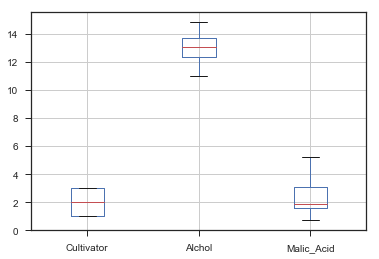

In [25]:
boxplot2 = wine_df.boxplot(column=["Cultivator", "Alchol", "Malic_Acid"])


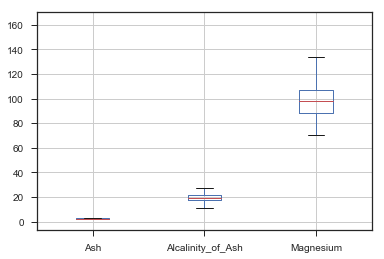

In [26]:
boxplot2 = wine_df.boxplot(column=["Ash", "Alcalinity_of_Ash", "Magnesium"])


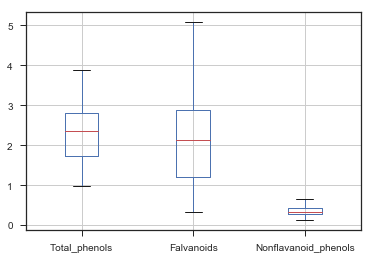

In [27]:
boxplot3 = wine_df.boxplot(column=["Total_phenols", "Falvanoids", "Nonflavanoid_phenols"])


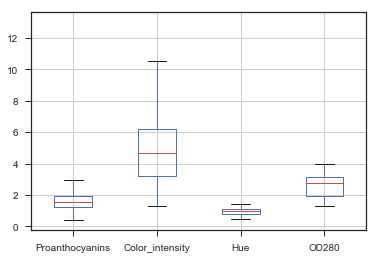

In [28]:
boxplot4 = wine_df.boxplot(column=["Proanthocyanins", "Color_intensity", "Hue", "OD280"])


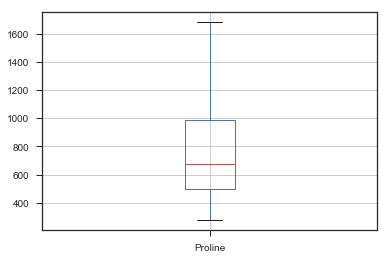

In [29]:
boxplot5 = wine_df.boxplot(column=["Proline"]) 

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


C:\Users\Karthikeyan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Karthikeyan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


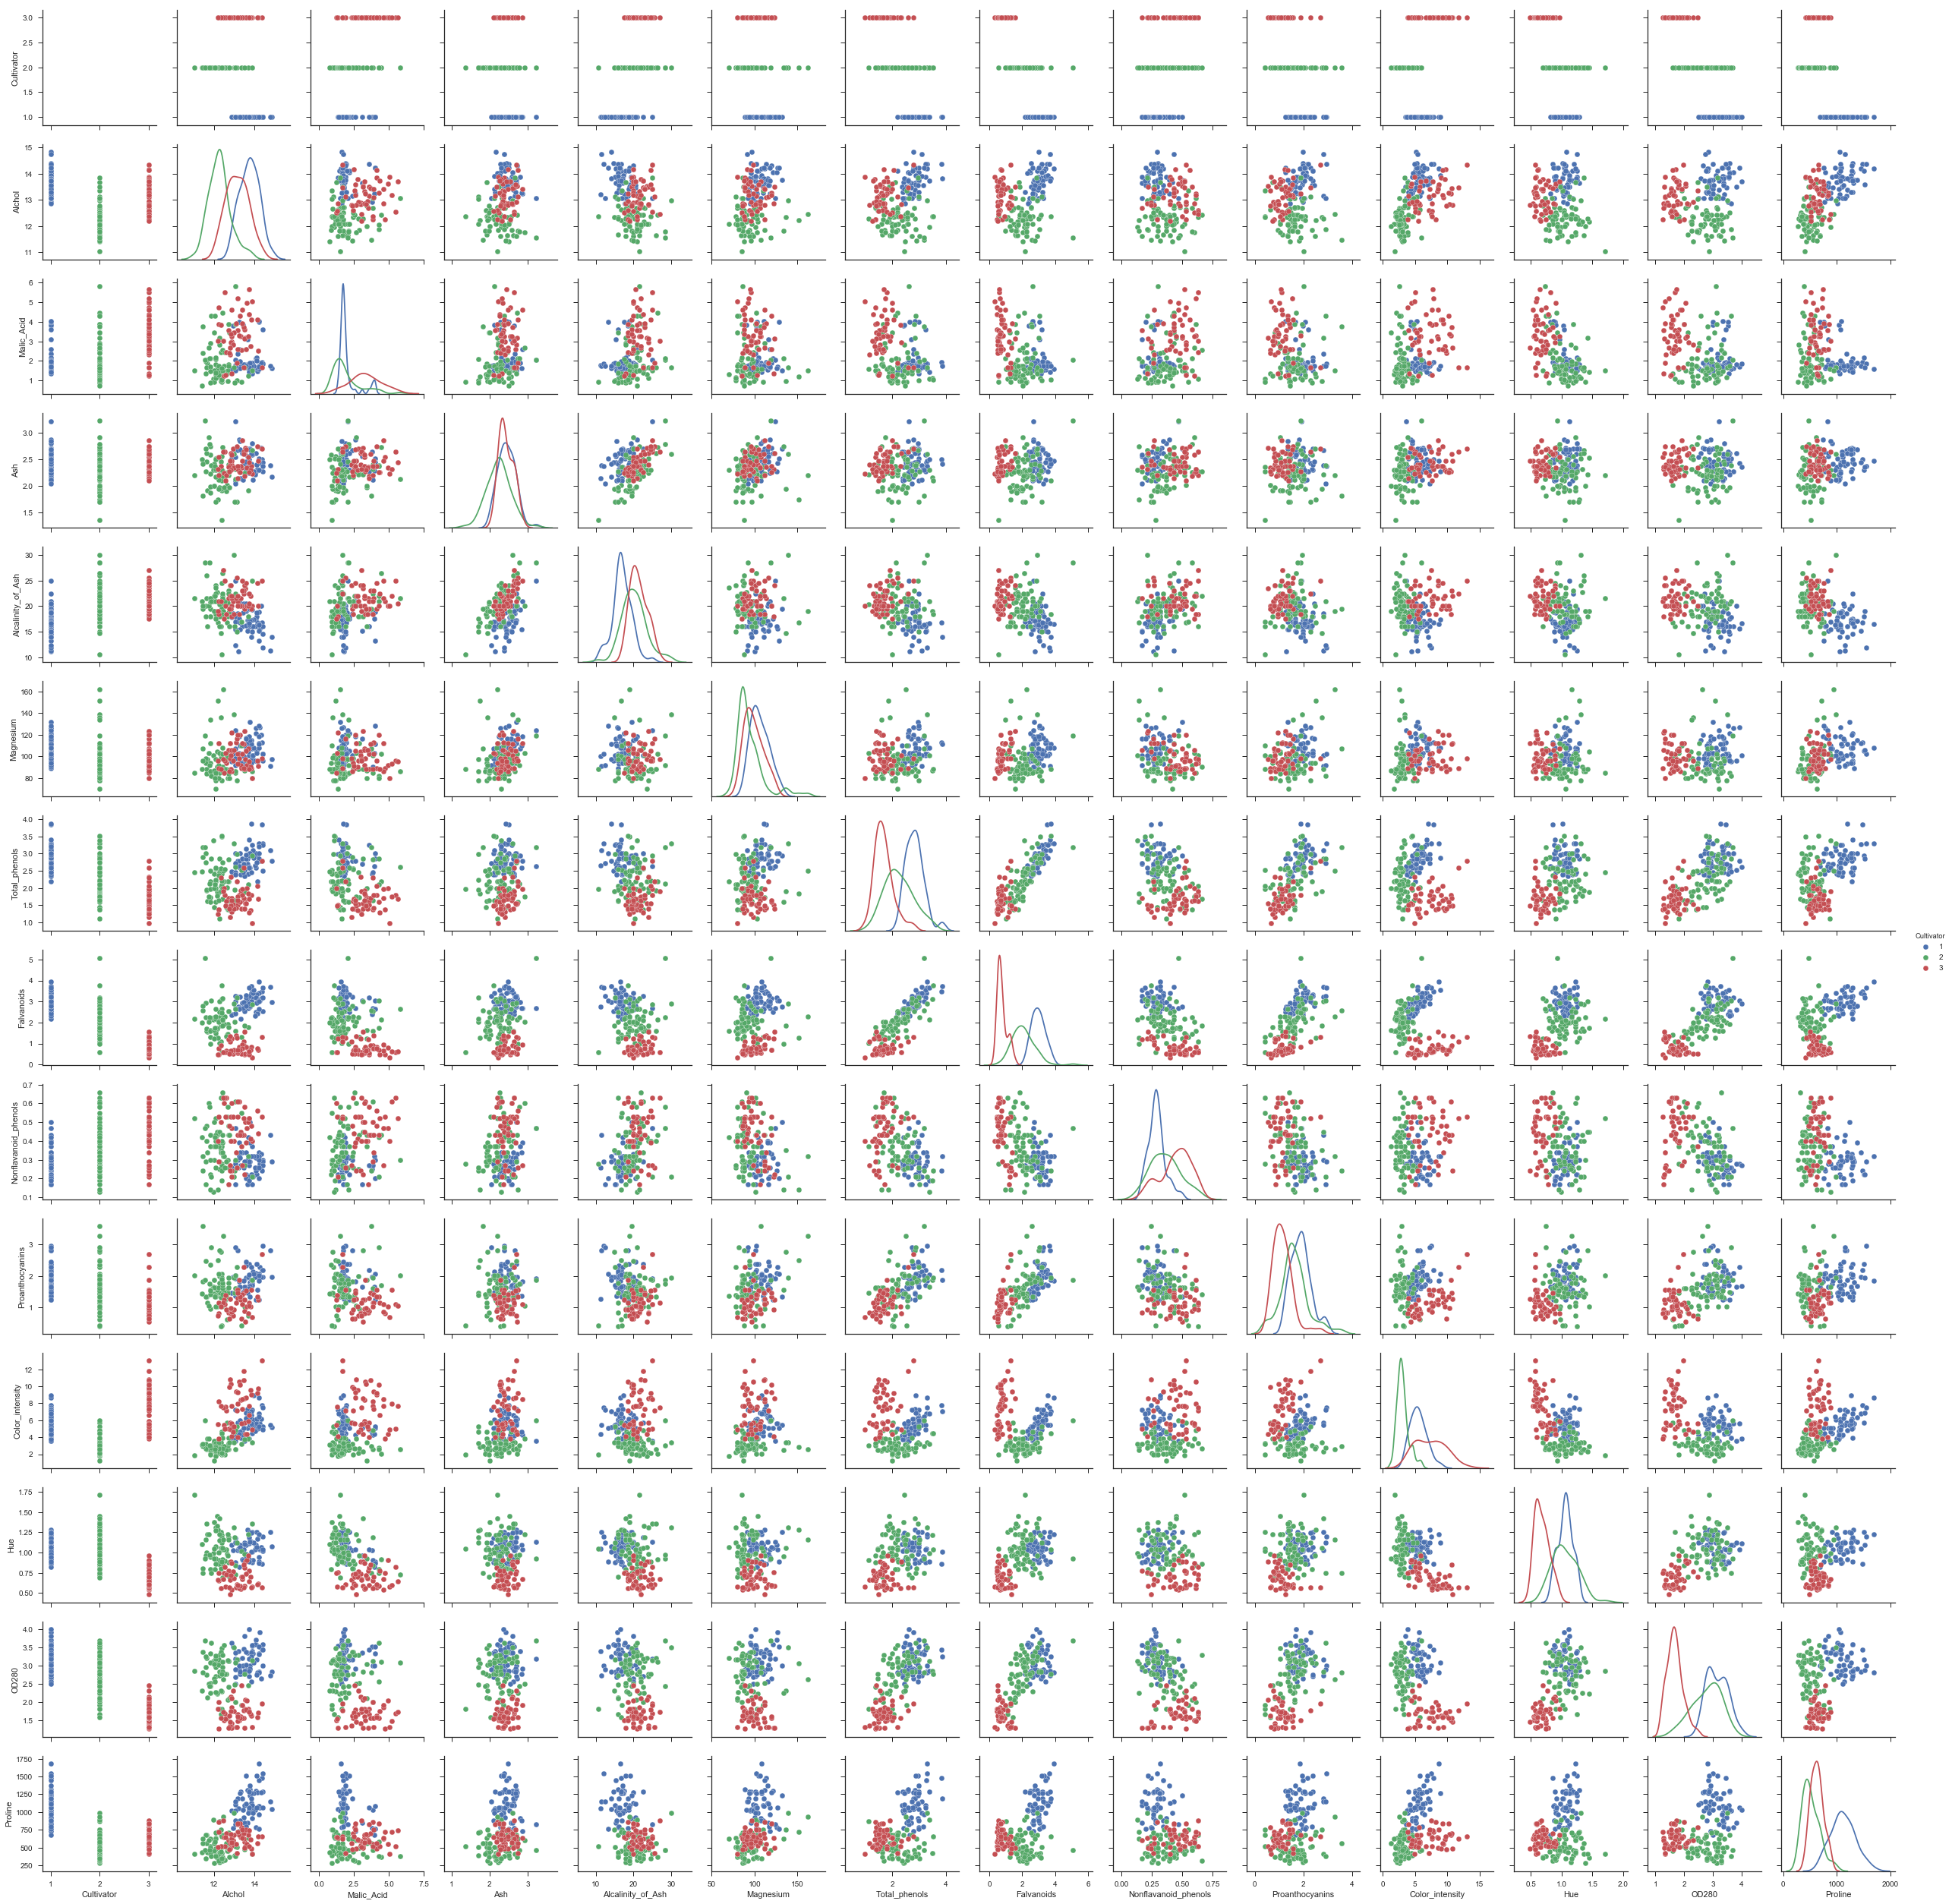

In [30]:
sns.pairplot(wine_df , diag_kind = "kde", hue="Cultivator")

# Q7 Split the wine_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



In [31]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X =  wine_df.drop("Cultivator", axis=1)
y =  wine_df.pop("Cultivator")
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
clf= clf_entropy.fit(train_set, train_labels)


In [34]:
pred= clf.predict(test_set)

# Q9 Print the accuracy of the model & print the confusion matrix 

In [35]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [36]:
confusion_matrix(test_labels, pred)

array([[22,  1,  0],
       [ 1, 18,  0],
       [ 0,  0, 12]], dtype=int64)

In [37]:
accuracy_score(test_labels, pred)*100

96.29629629629629

In [38]:
classification_report(test_labels, pred)

'             precision    recall  f1-score   support\n\n          1       0.96      0.96      0.96        23\n          2       0.95      0.95      0.95        19\n          3       1.00      1.00      1.00        12\n\navg / total       0.96      0.96      0.96        54\n'

# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

In [39]:
clf_entropyReg = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 80)
clfReg= clf_entropy.fit(train_set, train_labels)
predReg= clfReg.predict(test_set)

In [40]:
confusion_matrix(test_labels, predReg)

array([[22,  1,  0],
       [ 1, 18,  0],
       [ 0,  0, 12]], dtype=int64)

In [41]:
accuracy_score(test_labels, predReg)*100

96.29629629629629

# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rfc= rf.fit(train_set, train_labels)
predRF= rfc.predict(test_set)

In [45]:
Err= abs((predRF- test_labels))
print('Mean Absolute Error---:', round(np.mean(Err), 2), 'degrees.')

Mean Absolute Error---: 0.07 degrees.


In [46]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (Err / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.95 %.


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [47]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

In [50]:
kfold = model_selection.KFold(n_splits=20, random_state=100)
model = AdaBoostClassifier(n_estimators=30, random_state=100)
results = model_selection.cross_val_score(model,train_set, train_labels, cv=kfold)
print("Model Accuracy with Adaboost: ", results.mean())

Model Accuracy with Adaboost:  0.7845238095238096


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [51]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

In [52]:
kfold = model_selection.KFold(n_splits=10, random_state=100)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=100)
results = model_selection.cross_val_score(model, train_set, train_labels, cv=kfold)
print("Model Accuracy with Bagging: ", results.mean())

Model Accuracy with Bagging:  0.9833333333333332


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [53]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
kfold = model_selection.KFold(n_splits=10, random_state=100)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=100)
results = model_selection.cross_val_score(model, train_set, train_labels, cv=kfold)
print("Model Accuracy with GradientBoost: ", results.mean())

Model Accuracy with GradientBoost:  0.9596153846153846


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [55]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [56]:
kfold = model_selection.KFold(n_splits=10, random_state=100)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, train_set, train_labels, cv=kfold)
print("Model Accuracy: ", results.mean())

Model Accuracy:  0.933974358974359


C:\Users\Karthikeyan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Karthikeyan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Karthikeyan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Karthikeyan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous